In [2]:
! pip install pydotplus
! pip install folium
#! pip install imblearn

     |████████████████████████████████| 286kB 10.2MB/s eta 0:00:01
  Stored in directory: /home/dsxuser/.cache/pip/wheels/35/7b/ab/66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus
     |████████████████████████████████| 102kB 10.5MB/s ta 0:00:01


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import preprocessing
from scipy import stats
import scipy as sp
import random
import seaborn as sns
from sklearn.metrics import accuracy_score,f1_score,log_loss,classification_report,confusion_matrix,jaccard_similarity_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


In [4]:
!wget -O Data-Collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

--2020-09-22 17:48:39--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘Data-Collisions.csv’

100%[======================================>] 73,917,638  45.2MB/s   in 1.6s   

2020-09-22 17:48:41 (45.2 MB/s) - ‘Data-Collisions.csv’ saved [73917638/73917638]



In [5]:
main_df=pd.read_csv('Data-Collisions.csv')
main_df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [6]:
#Converting Severity Code from 1,2 to 0,1
severity_code = main_df['SEVERITYCODE'].values
labels = preprocessing.LabelEncoder()
labels.fit([1, 2])
severity_code = labels.transform (severity_code)
main_df ["SEVERITYCODE"] = severity_code
main_df["SEVERITYCODE"].head()

0    1
1    0
2    0
3    0
4    1
Name: SEVERITYCODE, dtype: int64

In [7]:
descriptive_stats= main_df.describe(include="all")
main_df.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,0.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,0.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,0.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,0.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,1.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,1.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


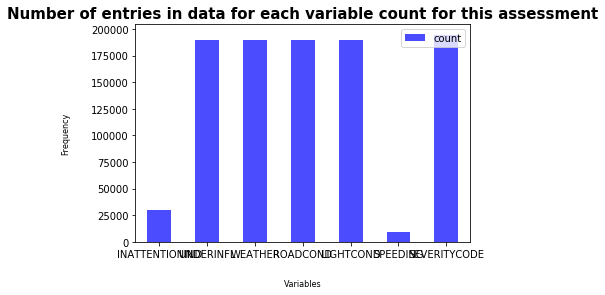

In [9]:
descriptive_stats_plot=descriptive_stats[["INATTENTIONIND","UNDERINFL","WEATHER","ROADCOND","LIGHTCOND","SPEEDING","SEVERITYCODE"]]
descriptive_stats_plot.drop(['unique','top','freq','mean','std','min','max','25%','50%','75%'],axis=0,inplace=True)
descriptive_stats_plot=descriptive_stats_plot.transpose()

color_yo=['blue','blue','blue','blue','blue','blue','blue']
descriptive_stats_plot.plot(kind='bar',alpha=0.70,color=[color_yo])
plt.title('Number of entries in data for each variable count for this assessment', fontsize=15, fontweight='bold')
plt.xlabel("Variables",fontsize=8,labelpad=20)
plt.ylabel("Frequency",fontsize=8,labelpad=20)
plt.xticks(rotation=360)
plt.show()

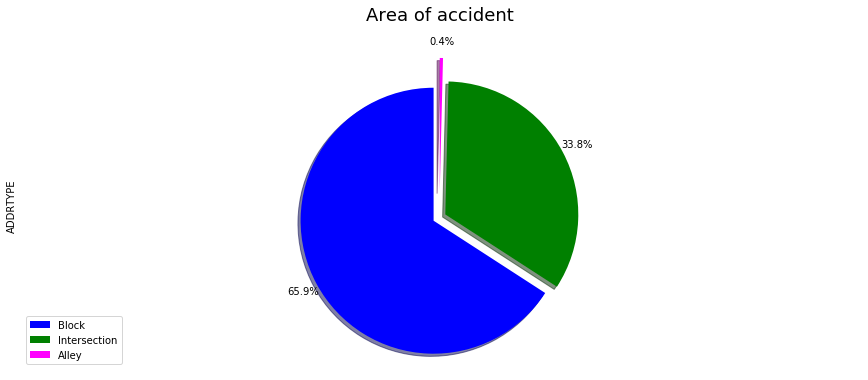

In [10]:
#Area type of each accident
explode_list = [0.05, 0.05, 0.2]
color_list=['blue','green','magenta']
addtype=main_df['ADDRTYPE'].value_counts()

addtype.plot(kind='pie',
            figsize=(15, 6),
            autopct='%1.1f%%',
            startangle=90,
            shadow=True,
            labels=None,
            pctdistance=1.12,
            colors=color_list,
            explode=explode_list)


plt.title('Area of accident', fontsize=18, y=1.05)
plt.axis('equal')
plt.legend(labels=addtype.index, loc='lower left')

plt.show()

In [11]:
#Check IncKey unqiue numbers
main_df['INCKEY'].nunique()

194673

In [12]:
#Encoding in attention (0 = No, 1 = Yes)
main_df["INATTENTIONIND"].replace("Y", 1, inplace=True)
main_df["INATTENTIONIND"].replace(np.nan, 0, inplace=True)

#Encoding Under the influence (0 = No, 1 = Yes)
main_df["UNDERINFL"].replace("N", 0, inplace=True)
main_df["UNDERINFL"].replace("Y", 1, inplace=True)

#Encoding Speeding(0 = No, 1 = Yes)
main_df["SPEEDING"].replace("Y", 1, inplace=True)
main_df["SPEEDING"].replace(np.nan, 0, inplace=True)

#Encoding Light Conditions(0 = Light, 1 = Medium, 2 = Dark)
main_df["LIGHTCOND"].replace("Daylight", 0, inplace=True)
main_df["LIGHTCOND"].replace("Dark - Street Lights On", 1, inplace=True)
main_df["LIGHTCOND"].replace("Dark - No Street Lights", 2, inplace=True)
main_df["LIGHTCOND"].replace("Dusk", 1, inplace=True)
main_df["LIGHTCOND"].replace("Dawn", 1, inplace=True)
main_df["LIGHTCOND"].replace("Dark - Street Lights Off", 2, inplace=True)
main_df["LIGHTCOND"].replace("Dark - Unknown Lighting", 2, inplace=True)
main_df["LIGHTCOND"].replace("Other","Unknown", inplace=True)

#Encoding Weather Conditions(0 = Clear, 1 = Overcast and Cloudy, 2 = Windy, 3 = Rain and Snow
main_df["WEATHER"].replace("Clear", 0, inplace=True)
main_df["WEATHER"].replace("Raining", 3, inplace=True)
main_df["WEATHER"].replace("Overcast", 1, inplace=True)
main_df["WEATHER"].replace("Other", "Unknown", inplace=True)
main_df["WEATHER"].replace("Snowing", 3, inplace=True)
main_df["WEATHER"].replace("Fog/Smog/Smoke", 2, inplace=True)
main_df["WEATHER"].replace("Sleet/Hail/Freezing Rain", 3, inplace=True)
main_df["WEATHER"].replace("Blowing Sand/Dirt", 2, inplace=True)
main_df["WEATHER"].replace("Severe Crosswind", 2, inplace=True)
main_df["WEATHER"].replace("Partly Cloudy", 1, inplace=True)

#Encoding Road Conditions(0 = Dry, 1 = Mushy, 2 = Wet)
main_df["ROADCOND"].replace("Dry", 0, inplace=True)
main_df["ROADCOND"].replace("Wet", 2, inplace=True)
main_df["ROADCOND"].replace("Ice", 2, inplace=True)
main_df["ROADCOND"].replace("Snow/Slush", 1, inplace=True)
main_df["ROADCOND"].replace("Other", "Unknown", inplace=True)
main_df["ROADCOND"].replace("Standing Water", 2, inplace=True)
main_df["ROADCOND"].replace("Sand/Mud/Dirt", 1, inplace=True)
main_df["ROADCOND"].replace("Oil", 2, inplace=True)

In [13]:
#Making new dataframe with only variables and unique keys
selected_columns=main_df[["X","Y","INCKEY","INATTENTIONIND","UNDERINFL","WEATHER","ROADCOND","LIGHTCOND","SPEEDING","SEVERITYCODE"]]
feature_df=selected_columns.copy()
feature_df.dropna(axis=0,how='any',inplace=True)
feature_stats=feature_df.describe()
feature_df.describe()

,X,Y,INCKEY,INATTENTIONIND,SPEEDING,SEVERITYCODE
count,184167.000000,184167.000000,184167.000000,184167.000000,184167.000000,184167.000000
mean,-122.330502,47.619544,138384.461586,0.158003,0.047278,0.304142
std,0.030018,0.056215,85503.159003,0.364745,0.212233,0.460045
min,-122.419091,47.495573,1001.000000,0.000000,0.000000,0.000000
25%,-122.348846,47.575884,68873.500000,0.000000,0.000000,0.000000
50%,-122.330168,47.615361,120488.000000,0.000000,0.000000,0.000000
75%,-122.311922,47.663835,199259.000000,0.000000,0.000000,1.000000
max,-122.238949,47.734142,331342.000000,1.000000,1.000000,1.000000


In [14]:
np.count_nonzero(feature_df['UNDERINFL']) 

86923

In [15]:
lightcondsize = feature_df ["LIGHTCOND"].size
print("lightcondsize:", lightcondsize)
featureinlightcond = feature_df ['LIGHTCOND'] == 'Unknown'
featureinlightcond

lightcondsize: 184167


0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
11        False
12        False
13        False
14        False
16        False
18        False
19         True
20        False
21        False
22        False
23         True
24        False
25        False
26         True
27        False
28        False
30        False
31        False
32        False
33        False
          ...  
194639    False
194640    False
194641    False
194642    False
194643    False
194644    False
194645    False
194647    False
194648    False
194649    False
194650    False
194651    False
194652    False
194653    False
194656    False
194657    False
194658    False
194659    False
194661    False
194662    False
194663    False
194664    False
194665    False
194666    False
194667    False
194668    False
194669    False
194670    False
194671    False
194672    False
Name: LIGHTCOND, Length:

In [17]:
 #Light Condition
lightcondsize = feature_df ["LIGHTCOND"].size

featureinlightcond = feature_df ['LIGHTCOND'] == 'Unknown'

lightcond = feature_df['LIGHTCOND']
lightcond = lightcond.values
lightcond = lightcond[featureinlightcond]

lightcond[0:9036]=0
lightcond[9036:13417]=1
lightcond[13417:13961]=2

feature_df.loc [feature_df.LIGHTCOND == "Unknown", 'LIGHTCOND'] = lightcond

feature_df["LIGHTCOND"]=feature_df["LIGHTCOND"].astype(int)

In [18]:
 #Road Condition
roadcondsize = feature_df ["ROADCOND"].size

featureinroadcond = feature_df ['ROADCOND'] == 'Unknown'

roadcond = feature_df['LIGHTCOND']
roadcond = roadcond.values
roadcond = roadcond[featureinroadcond]

roadcond[0:9954]=0
roadcond[9954:10040]=1
roadcond[10040:15163]=2

feature_df.loc[feature_df.ROADCOND == "Unknown", 'ROADCOND'] = roadcond
feature_df["ROADCOND"]=feature_df["ROADCOND"].astype(int)

In [19]:
#Weather Condition

weathersize = feature_df ["WEATHER"].size
featureinweather = feature_df ['WEATHER'] == 'Unknown'

weather = feature_df['WEATHER']
weather = weather.values
weather = weather[featureinweather]

weather[0:10151]=0
weather[10151:12683]=1
weather[12683:12742]=2
weather[12742:15864]=3

feature_df.loc[feature_df.WEATHER == "Unknown", 'WEATHER'] = weather
feature_df["WEATHER"]=feature_df["WEATHER"].astype(int)

In [20]:
 #Converting remaining to int
feature_df["SPEEDING"]=feature_df["SPEEDING"].astype(int)
feature_df["INATTENTIONIND"]=feature_df["INATTENTIONIND"].astype(int)
feature_df["UNDERINFL"]=feature_df["UNDERINFL"].astype(int)

In [21]:
#ML Feature Sets
X=feature_df[["SPEEDING","INATTENTIONIND","UNDERINFL","ROADCOND","WEATHER","LIGHTCOND"]].values
y=feature_df[["SEVERITYCODE"]].values

In [22]:
#Test/Train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (110500, 6) (110500, 1)
Test set: (73667, 6) (73667, 1)


False

In [23]:
#Decision Tree Clasifier
DT = DecisionTreeClassifier(criterion="entropy", max_depth=8)
DT.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [24]:
yhatDT = DT.predict(X_test)

In [25]:
print('Accuracy score for Decision Tree = ', accuracy_score(yhatDT, y_test))

Accuracy score for Decision Tree =  0.6961868950819227


In [62]:
print('Decision Tree')
print(pd.crosstab(y_test.ravel(), yhatDT.ravel(), rownames = ['True'], colnames = ['Predicted'], margins = True))
print("\n\n", classification_report(y_test, yhatDT))
print("\n\nJaccard", jaccard_similarity_score(y_test, yhatDT))

print("\n\nf1 Score:", f1_score(y_test, yhatDT, average='weighted'))

Decision Tree
Predicted      0    1    All
True                        
0          51201   87  51288
1          22294   85  22379
All        73495  172  73667


               precision    recall  f1-score   support

           0       0.70      1.00      0.82     51288
           1       0.49      0.00      0.01     22379

   micro avg       0.70      0.70      0.70     73667
   macro avg       0.60      0.50      0.41     73667
weighted avg       0.64      0.70      0.57     73667



Jaccard 0.6961868950819227


f1 Score: 0.5736316142167384


In [27]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

Confusion matrix, without normalization
[[   85 22294]
 [   87 51201]]


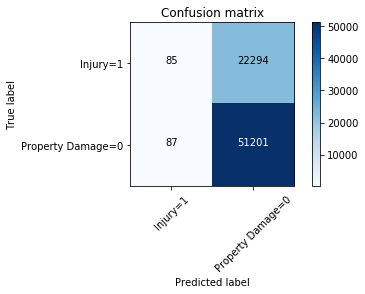

In [66]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#Plot it
cnf_matrix = confusion_matrix(y_test, yhatDT, labels=[1,0])
np.set_printoptions(precision=2)


# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Injury=1','Property Damage=0'],normalize= False,  title='Confusion matrix')

In [65]:
#Logistic Regression
LR = LogisticRegression(C=6, solver='liblinear').fit(X_train,y_train)

yhatLR = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)

print(log_loss(y_test, yhat_prob))

print ("Accuracy", accuracy_score(yhatLR,y_test))
print (classification_report(y_test, yhatLR))

print("\n\nJaccard LR", jaccard_similarity_score(y_test, yhatLR))
print("\n\nJaccard DT", jaccard_similarity_score(y_test, yhatDT))

print("\n\nf1 Score:", f1_score(y_test, yhatLR, average='weighted'))

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6104909234679324
Accuracy 0.6961325966850829
              precision    recall  f1-score   support

           0       0.70      1.00      0.82     51288
           1       0.40      0.00      0.00     22379

   micro avg       0.70      0.70      0.70     73667
   macro avg       0.55      0.50      0.41     73667
weighted avg       0.61      0.70      0.57     73667



Jaccard LR 0.6961325966850829


Jaccard DT 0.6961868950819227


f1 Score: 0.5717865357428336


Confusion matrix, without normalization
[[   12 22367]
 [   18 51270]]


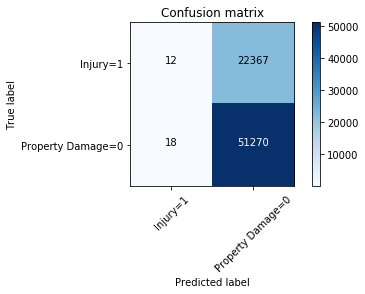

In [67]:
cnf_matrix = confusion_matrix(y_test, yhatLR, labels=[1,0])
np.set_printoptions(precision=2)


        # Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Injury=1','Property Damage=0'],normalize= False,  title='Confusion matrix')

In [33]:
# KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k = 3
neigh3 = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train.ravel())
knn_yhat3 = neigh3.predict(X_test)
print("Accuary-k3: ", metrics.accuracy_score(y_test, knn_yhat3))

k = 4
neigh4 = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train.ravel())
knn_yhat4 = neigh4.predict(X_test)
print("Accuary-k4:", metrics.accuracy_score(y_test, knn_yhat4))

k = 5
neigh5 = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train.ravel())
knn_yhat5 = neigh5.predict(X_test)
print("Accuary-k5: ", metrics.accuracy_score(y_test, knn_yhat5))

k = 6
neigh6 = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train.ravel())
knn_yhat6 = neigh6.predict(X_test)
print("Accuary-k6: ", metrics.accuracy_score(y_test, knn_yhat6))

k = 7
neigh7 = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train.ravel())
knn_yhat7 = neigh7.predict(X_test)
print("Accuary-k7: ", metrics.accuracy_score(y_test, knn_yhat7))


Accuary-k3:  0.533875412328451
Accuary-k4: 0.6877977927701685
Accuary-k5:  0.6806439789865204
Accuary-k6:  0.6922366867118248
Accuary-k7:  0.6910692711797685


In [33]:
k = 8
neigh8 = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train.ravel())
knn_yhat8 = neigh8.predict(X_test)
print("Accuary-k8: ", metrics.accuracy_score(y_test, knn_yhat8))

k = 9
neigh9 = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train.ravel())
knn_yhat9 = neigh9.predict(X_test)
print("Accuary-k9: ", metrics.accuracy_score(y_test, knn_yhat9))

Accuary-k8:  0.6914765091560672
Accuary-k9:  0.6853815141107958


In [34]:
k = 6
neigh6 = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train.ravel())
knn_yhat6 = neigh6.predict(X_test)
print("Accuary-k6: ", metrics.accuracy_score(y_test, knn_yhat6))

Accuary-k6:  0.6922366867118248


In [35]:
print (classification_report(y_test, knn_yhat6))

              precision    recall  f1-score   support

           0       0.70      0.98      0.82     51288
           1       0.40      0.03      0.05     22379

    accuracy                           0.69     73667
   macro avg       0.55      0.50      0.43     73667
weighted avg       0.61      0.69      0.58     73667



In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
k = 6
neigh6 = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train.ravel())
knn_yhat6 = neigh6.predict(X_test)
print("Accuary-k4: ", metrics.accuracy_score(y_test, knn_yhat6))

Accuary-k4:  0.6922366867118248


In [55]:
f1_score(y_test, knn_yhat6, average='weighted')

0.5830369812583746

In [61]:
print (classification_report(y_test, knn_yhat6))

              precision    recall  f1-score   support

           0       0.70      0.98      0.82     51288
           1       0.40      0.03      0.05     22379

   micro avg       0.69      0.69      0.69     73667
   macro avg       0.55      0.50      0.43     73667
weighted avg       0.61      0.69      0.58     73667



In [56]:
jaccard_similarity_score(y_test, knn_yhat6)

0.6922366867118248

In [ ]:
              precision    recall  f1-score   support

           0       0.70      0.97      0.81     51288
           1       0.35      0.03      0.06     22379

   micro avg       0.69      0.69      0.69     73667
   macro avg       0.53      0.50      0.44     73667
weighted avg       0.59      0.69      0.58     73667

